<a href="https://colab.research.google.com/github/sak1b0/proteiNN/blob/master/RuNN_forest_RuNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

url_train='https://raw.githubusercontent.com/sak1b0/proteiNN/master/train_formatted.csv'
url_test='https://raw.githubusercontent.com/sak1b0/proteiNN/master/test_formatted.csv'

df_train=pd.read_csv(url_train,header=None)
df_test=pd.read_csv(url_test,header=None)


one_hot = MultiLabelBinarizer() #finally the ultimate solution

df_train=np.asarray(df_train)
df_test=np.asarray(df_test)

X_train = df_train[:, 0]
y_train = df_train[:, 1]

X_test = df_test[:, 0]
y_test = df_test[:, 1]

def debug_me():
  print('train dataframe: ',df_train.shape)
  print('X train shape: ',X_train.shape)
  print('y train shape: ',y_train.shape)

  print('test dataframe: ',df_test.shape)
  print('X test shape: ',X_test.shape)
  print('y test shape: ',y_test.shape)
  

debug_me()

max_length_train=0
for item in range (len(X_train)):
  max_length_train=max(max_length_train,len(X_train[item])) #finding maximum length of string in training
  
  
print('Maximum length of train: ',max_length_train)

max_length_test=0
for item in range (len(X_test)):
  max_length_test=max(max_length_test,len(X_test[item])) #finding maximum length of string in testing set
  
print('Maximum length of test: ',max_length_test)

#max_length_train=max(max_length_train,max_length_test)



for item in range (len(X_train)):
  X_train[item] = X_train[item]+'Z'*(max_length_train-len(X_train[item])) # padding with 'Z' to make all of them the same length
  #X_train[item] = one_hot.fit_transform(X_train[item])
  
  
for item in range (len(y_train)):
  y_train[item] = y_train[item]+'Z'*(max_length_train-len(y_train[item])) # padding with 'Z' to make all of them the same length
  #y_train[item] = one_hot.fit_transform(y_train[item])
  
  
for item in range (len(X_test)):
  X_test[item] = X_test[item]+'Z'*(max_length_train-len(X_test[item])) # padding with 'Z' to make all of them the same length
  #X_test[item] =one_hot.fit_transform(X_test[item])
  
  
for item in range (len(y_test)):
  y_test[item] = y_test[item]+'Z'*(max_length_train-len(y_test[item])) # padding with 'Z' to make all of them the same length  
  #y_test[item] = one_hot.fit_transform(y_test[item])
  
  
#print(X_train[0])
#print(y_train[0])


print('\nafter padding: \n')

debug_me()
#print(X_train[0])
#print(y_train[0])


#encoding to integer of X_train
s=list(X_train)

for item in range(len(s)):
  s[item]=list(s[item])
  
for i in range(len(s)):
  for item in range(len(s[i])):
    s[i][item]=ord(s[i][item])-64
X_train=np.array(s).reshape(4590, 1,1303 )

#encoding to integer of y_train

s=list(y_train)

for item in range(len(s)):
  s[item]=list(s[item])
  
for i in range(len(s)):
  for item in range(len(s[i])):
    s[i][item]=ord(s[i][item])-64
y_train=np.array(s).reshape(4590, 1, 1303)

#encoding to integer of X_test

s=list(X_test)

for item in range(len(s)):
  s[item]=list(s[item])
  
for i in range(len(s)):
  for item in range(len(s[i])):
    s[i][item]=ord(s[i][item])-64
X_test=np.array(s).reshape(1199, 1, 1303)

#encoding to integer of y_test

s=list(y_test)

for item in range(len(s)):
  s[item]=list(s[item])
  
for i in range(len(s)):
  for item in range(len(s[i])):
    s[i][item]=ord(s[i][item])-64
y_test=np.array(s).reshape(1199, 1, 1303)

print('\nafter encoding to integers\n')
debug_me()

display(X_train[0])

X_train=X_train/26
y_train=y_train/26
X_test=X_test/26
y_test=y_test/26

display(X_train[0])
#=======================this is where the fun part begins====================

outp=1303
model=Sequential()

model.add(LSTM((1303),input_shape=(1,1303),return_sequences=True,activation='sigmoid'))
model.add(LSTM((1303),input_shape=(1,1303),return_sequences=True,activation='sigmoid'))
model.add(LSTM((1303),input_shape=(1,1303),return_sequences=True,activation='sigmoid'))
model.add(LSTM((1303),input_shape=(1,1303),return_sequences=True,activation='sigmoid'))
model.add(LSTM((1303),input_shape=(1,1303),return_sequences=True,activation='sigmoid'))
model.add(LSTM((1303),input_shape=(1,1303),return_sequences=True,activation='sigmoid'))



model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

print(model.input_shape)
print(model.output_shape)

history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))





train dataframe:  (4590, 2)
X train shape:  (4590,)
y train shape:  (4590,)
test dataframe:  (1199, 2)
X test shape:  (1199,)
y test shape:  (1199,)
Maximum length of train:  1303
Maximum length of test:  1247

after padding: 

train dataframe:  (4590, 2)
X train shape:  (4590,)
y train shape:  (4590,)
test dataframe:  (1199, 2)
X test shape:  (1199,)
y test shape:  (1199,)

after encoding to integers

train dataframe:  (4590, 2)
X train shape:  (4590, 1, 1303)
y train shape:  (4590, 1, 1303)
test dataframe:  (1199, 2)
X test shape:  (1199, 1, 1303)
y test shape:  (1199, 1, 1303)


array([[18, 20, 14, ..., 26, 26, 26]])

array([[0.69230769, 0.76923077, 0.53846154, ..., 1.        , 1.        ,
        1.        ]])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 1303)           13587684  
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 1303)           13587684  
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 1303)           13587684  
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 1303)           13587684  
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 1303)           13587684  
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 1303)           13587684  
Total params: 81,526,104
Trainable params: 81,526,104
Non-trainable params: 0
________________________________________________________________

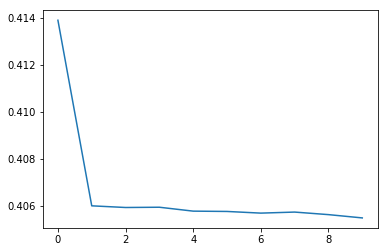

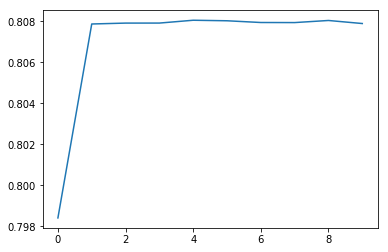

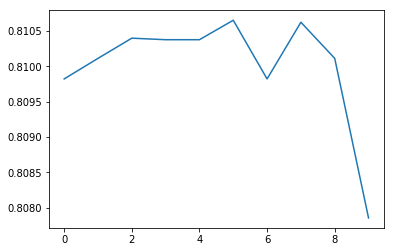

In [3]:
plt.plot(history.history['loss'])
plt.show()
plt.plot(history.history['acc'])
plt.show()
plt.plot(history.history['val_acc'])
plt.show()